In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mohiteyashprogrammer/House-price-prediction/main/data.csv')

In [5]:
housing = data.copy()

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
housing.duplicated().sum()

0

In [11]:
housing.shape

(506, 14)

<AxesSubplot:>

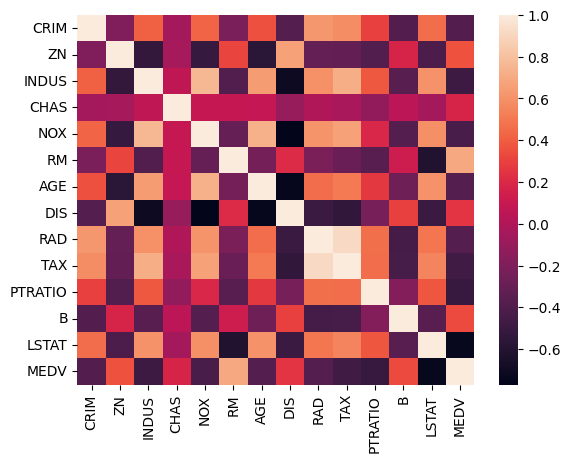

In [13]:
sns.heatmap(housing.corr())

In [18]:
x = housing.iloc[:,:-1]

In [20]:
y = housing.iloc[:,-1]

In [21]:
# divide data set in to train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
X_train.shape

(339, 13)

In [25]:
y_train.shape

(339,)

In [26]:
X_test.shape

(167, 13)

In [27]:
y_test.shape

(167,)

In [28]:
# featuren scalling -- standardlazation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [33]:
X_test = scaler.transform(X_test)

In [34]:
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

## LinearRegression

In [35]:
# select models
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [36]:
linear.fit(X_train,y_train)

LinearRegression()

In [37]:
linear.coef_

array([-0.98858032,  0.86793276,  0.40502822,  0.86183791, -1.90009974,
        2.80813518, -0.35866856, -3.04553498,  2.03276074, -1.36400909,
       -2.0825356 ,  1.04125684, -3.92628626])

In [38]:
linear.intercept_

22.970796460176988

In [44]:
y_predict = linear.predict(X_test)

In [46]:
#MSE & MAE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
print(np.sqrt(mae))

20.724023437339753
3.148255754816832
1.7743324814748875


In [49]:
## check accuracy R2 and ADjusted R square
score = r2_score(y_test,y_predict)
print(score*100)

72.61570836552475


In [50]:
# adjested r squre
1-(1-score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.7189213968412602

## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [52]:
ridge.fit(X_train,y_train)

Ridge()

In [53]:
y_predict = ridge.predict(X_test)

In [54]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
print(np.sqrt(mae))

20.7524163208003
3.146011462661694
1.7736999359141032


In [55]:
## check accuracy R2 and ADjusted R square
score = r2_score(y_test,y_predict)
print(score*100)

72.5781906024621


In [56]:
# adjested r squre
1-(1-score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.7185363059805561

## Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=20.0)

In [58]:
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [59]:
y_predict = lasso.predict(X_test)

In [60]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
print(np.sqrt(mae))

77.43966001117039
6.446420433469346
2.538980195564618


In [62]:
## check accuracy R2 and ADjusted R square
score = r2_score(y_test,y_predict)
print(score)

-0.023271489839964632


In [63]:
# adjested r squre
1-(1-score)*(len(y)-1)/(len(y)-x.shape[1]-1)

-0.05030915115687429

## ElasticNet

In [64]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=20.0)

In [65]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [66]:
y_predict = elastic.predict(X_test)

In [67]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(mae)
print(np.sqrt(mae))

77.43966001117039
6.446420433469346
2.538980195564618


In [68]:
## check accuracy R2 and ADjusted R square
score = r2_score(y_test,y_predict)
print(score)

-0.023271489839964632


In [69]:
# adjested r squre
1-(1-score)*(len(y)-1)/(len(y)-x.shape[1]-1)

-0.05030915115687429